# Enova Assesment:
    Submitted by: Charu Saxena

    Contents:
    1) Loading the Data
    2) Exploratory Data Analysis(EDA):
    3) Feature Engineering and Data Cleaning:
        a)Handle Missing values
        b)Redudndant Features
        c)One-hot coding for categorical features
    4) Predictive Modeling
    5) Cross Validation,Ensembling.
    6) Important Features Extraction and Checking Algorithms.

In [1]:
import pandas as pd # linear algebra
import numpy as np# data processing
import seaborn as sns# data visualization library  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
le = preprocessing.LabelEncoder()
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn import metrics
from sklearn.metrics import roc_curve, f1_score, accuracy_score, precision_recall_curve, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support


# 1)Loading the Data

In [2]:
df = pd.read_csv("/Users/charusaxena/Desktop/participant_files/participant_files/training_data.csv")
test_df = pd.read_csv("/Users/charusaxena/Desktop/participant_files/participant_files/charu_score.csv")

In [3]:
Train_data = df.copy()

In [4]:
print(test_df.shape)
print(Train_data.shape)

(11531, 33)
(15385, 33)


# 2)Exploratory Data Analysis(EDA):

In [5]:
Train_data.isnull().sum()

id                          0
diagnosis_date              0
gleason_score             320
t_score                     0
n_score                     0
m_score                     0
stage                       0
age                       748
race                      165
height                   1364
weight                   1317
family_history           1586
first_degree_history     1586
previous_cancer          1586
smoker                   1586
side                        0
tumor_diagnosis           303
tumor_6_months          10063
tumor_1_year             2123
psa_diagnosis            1398
psa_6_months             9503
psa_1_year               2517
tea                      1586
symptoms                  410
rd_thrpy                    0
h_thrpy                     0
chm_thrpy                   0
cry_thrpy                   0
brch_thrpy                  0
rad_rem                     0
multi_thrpy                 0
survival_1_year             0
survival_7_years            0
dtype: int

In [6]:
print("Number of observed paitents: ",Train_data.shape[0])
Train_data.describe()

Number of observed paitents:  15385


,id,gleason_score,age,race,height,weight,family_history,first_degree_history,previous_cancer,smoker,...,tea,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years
count,15385.000000,15065.000000,14637.000000,15220.000000,14021.000000,14068.000000,13799.000000,13799.000000,13799.000000,13799.000000,...,13799.000000,15385.000000,15385.000000,15385.000000,15385.000000,15385.000000,15385.000000,15385.000000,15385.000000,15385.000000
mean,7693.000000,7.299967,76.901073,3.480486,69.151202,176.800043,0.423871,0.211899,0.068773,0.054932,...,2.552721,0.537472,0.342866,0.663438,0.238869,0.245044,0.174586,0.778616,0.896913,0.432304
std,4441.411281,1.933395,9.617403,0.953454,1.127451,17.211988,0.613645,0.460531,0.253077,0.227855,...,1.618253,0.498610,0.474683,0.472549,0.426406,0.430127,0.379625,0.415192,0.304083,0.495412
min,1.000000,3.000000,32.000000,1.000000,65.000000,118.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3847.000000,6.000000,71.000000,3.000000,68.000000,166.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,7693.000000,7.000000,78.000000,4.000000,69.000000,174.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,11539.000000,9.000000,84.000000,4.000000,70.000000,184.000000,1.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,15385.000000,14.000000,107.000000,4.000000,73.000000,343.000000,5.000000,4.000000,1.000000,1.000000,...,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
print("gleason_score: ",Train_data.gleason_score.unique())
print("Stage: ",Train_data.stage.unique())
print("T_Scores: ",Train_data.t_score.unique())
print("M_score: ",Train_data.m_score.unique())
print("N_score: ",Train_data.n_score.unique())
print("side : ",Train_data.side.unique())
print("Race : ",Train_data.race.unique())

gleason_score:  [ 4.  8.  9.  3.  6.  7.  5. 10. nan 13. 14. 12.]
Stage:  ['I' 'IV' 'IIB' 'IIA' 'III']
T_Scores:  ['T1c' 'T3a' 'T1a' 'T2b' 'T4' 'T1b' 'T3b' 'T3c' 'T2c' 'T2a']
M_score:  ['M0' 'M1c' 'M1b' 'M1a']
N_score:  ['N0' 'N1' 'NX']
side :  ['both' 'right' 'left']
Race :  [ 4.  2.  3.  1. nan]


Lets see how many people actually survived after 7 years!!

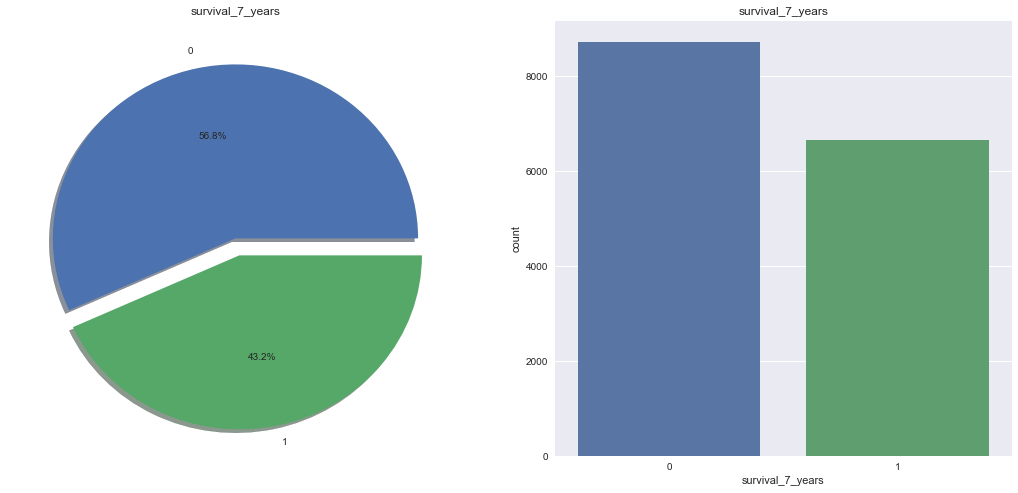

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
Train_data['survival_7_years'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('survival_7_years')
ax[0].set_ylabel('')
sns.countplot('survival_7_years',data=Train_data,ax=ax[1])
ax[1].set_title('survival_7_years')
plt.show()

Lets see how people are distributed according to race,side_of_cancer, stage with respect to survived_7_year or not

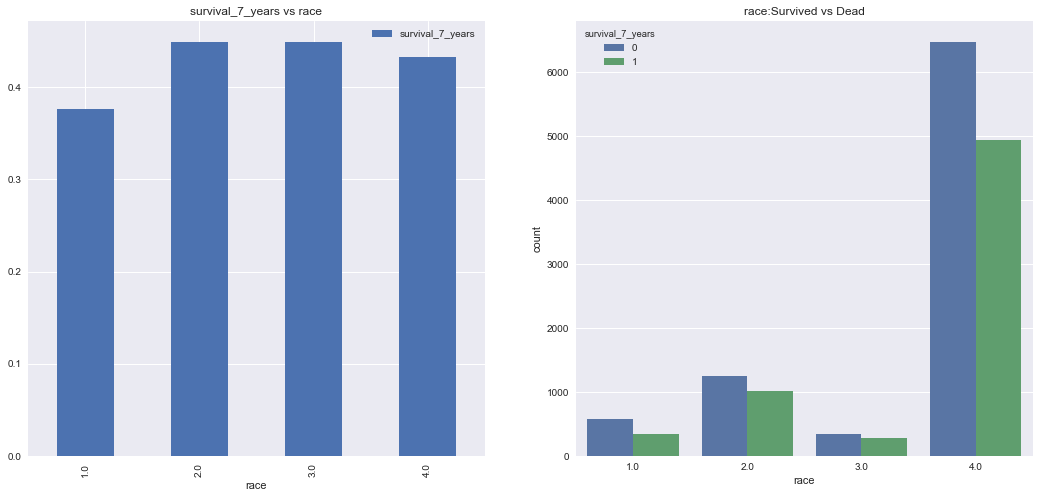

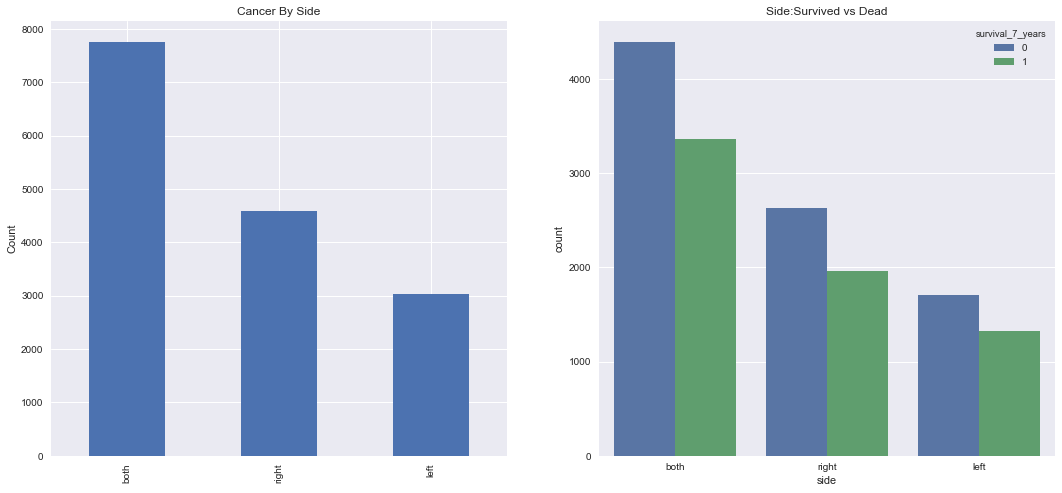

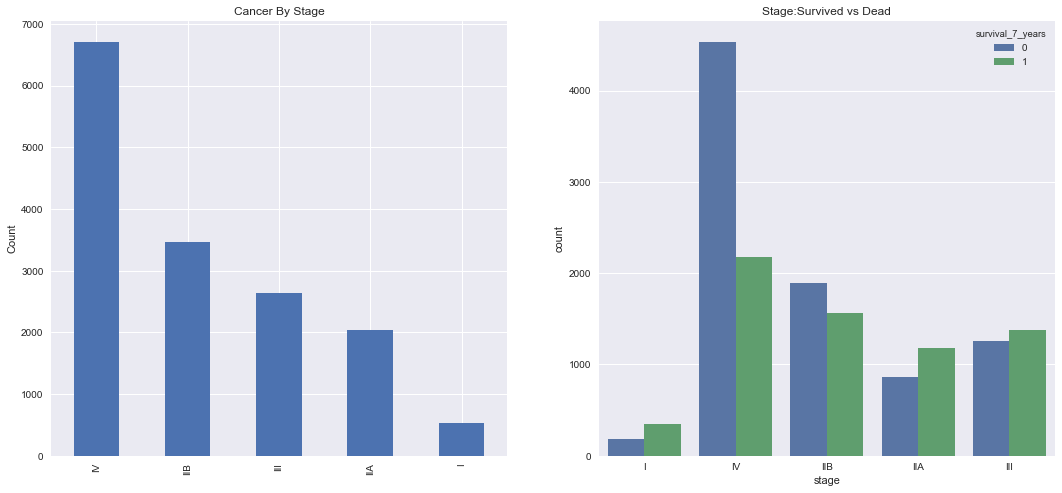

In [9]:

#RACE

f,ax=plt.subplots(1,2,figsize=(18,8))
Train_data[['race','survival_7_years']].groupby(['race']).mean().plot.bar(ax=ax[0])
ax[0].set_title('survival_7_years vs race')
sns.countplot('race',hue='survival_7_years',data=Train_data,ax=ax[1])
ax[1].set_title('race:Survived vs Dead')

#Side
f,ax=plt.subplots(1,2,figsize=(18,8))
Train_data['side'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Cancer By Side')
ax[0].set_ylabel('Count')
sns.countplot('side',hue='survival_7_years',data=Train_data,ax=ax[1])
ax[1].set_title('Side:Survived vs Dead')

#stage
f,ax=plt.subplots(1,2,figsize=(18,8))
Train_data['stage'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Cancer By Stage')
ax[0].set_ylabel('Count')
sns.countplot('stage',hue='survival_7_years',data=Train_data,ax=ax[1])
ax[1].set_title('Stage:Survived vs Dead')

plt.show()

Lets see how people are distributed according to test-scores with respect to survived_7_year or not

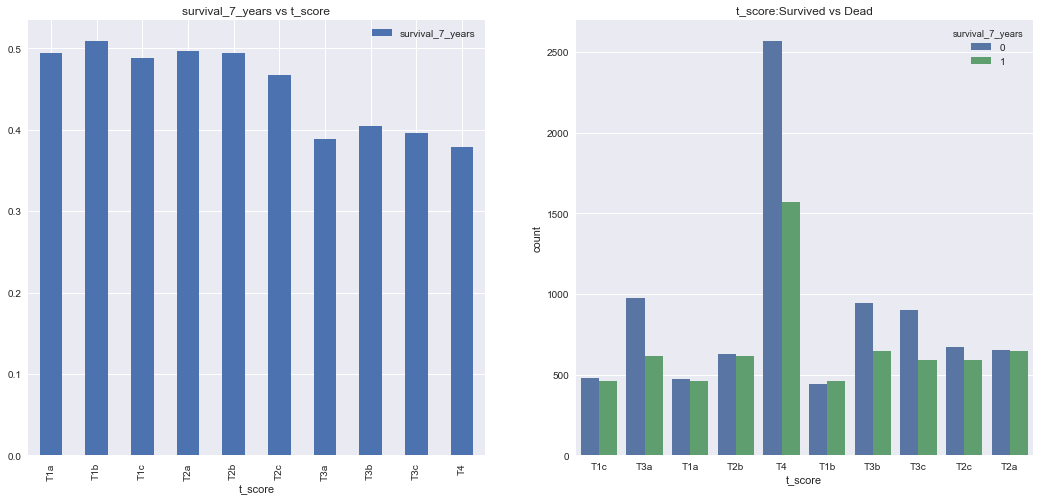

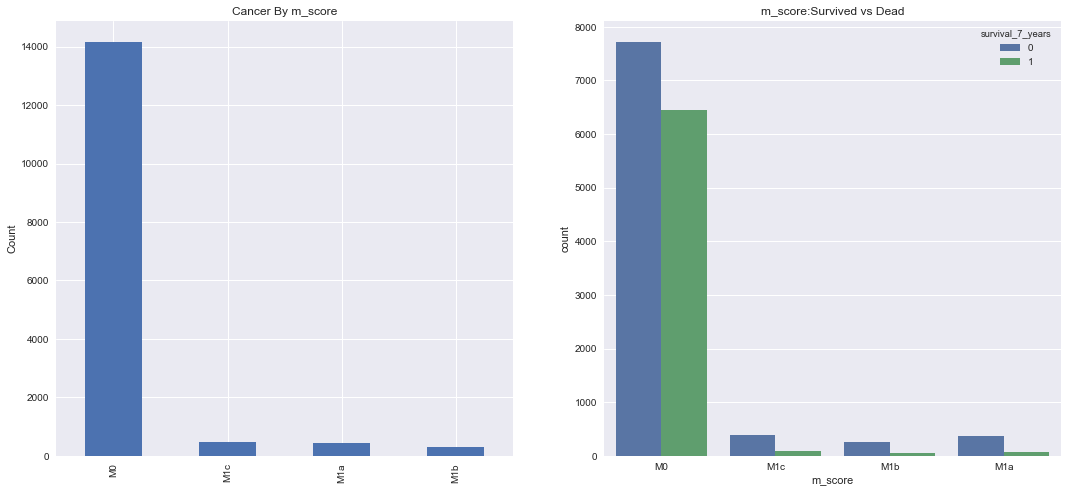

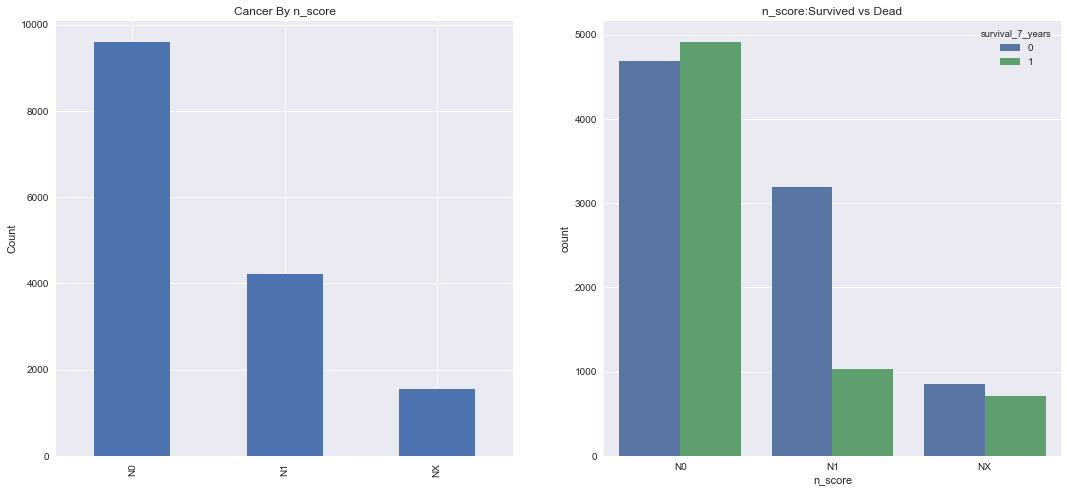

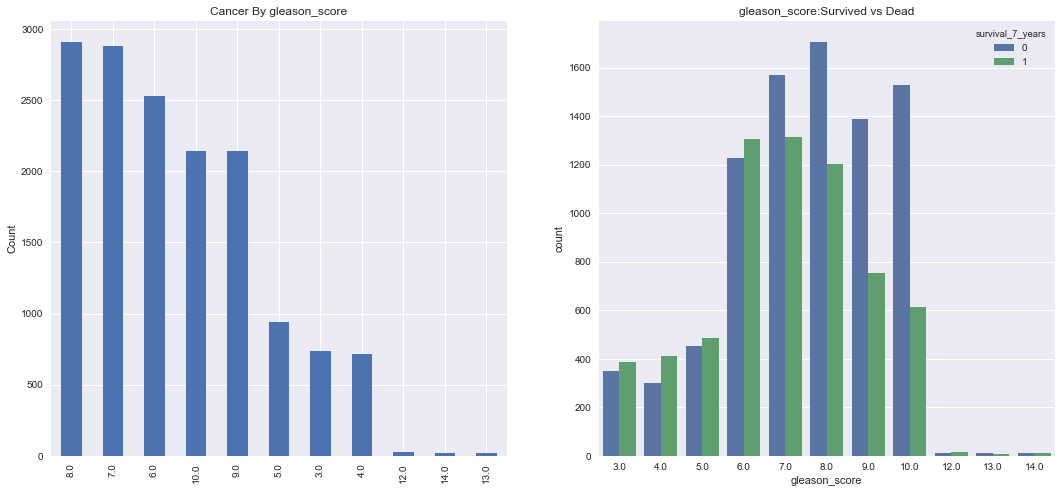

In [10]:
#how cells look under the cells:

#t_score
f,ax=plt.subplots(1,2,figsize=(18,8))
Train_data[['t_score','survival_7_years']].groupby(['t_score']).mean().plot.bar(ax=ax[0])
ax[0].set_title('survival_7_years vs t_score')
sns.countplot('t_score',hue='survival_7_years',data=Train_data,ax=ax[1])
ax[1].set_title('t_score:Survived vs Dead')

#m_score
f,ax=plt.subplots(1,2,figsize=(18,8))
Train_data['m_score'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Cancer By m_score')
ax[0].set_ylabel('Count')
sns.countplot('m_score',hue='survival_7_years',data=Train_data,ax=ax[1])
ax[1].set_title('m_score:Survived vs Dead')

#n_score
f,ax=plt.subplots(1,2,figsize=(18,8))
Train_data['n_score'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Cancer By n_score')
ax[0].set_ylabel('Count')
sns.countplot('n_score',hue='survival_7_years',data=Train_data,ax=ax[1])
ax[1].set_title('n_score:Survived vs Dead')

#gleason_score
f,ax=plt.subplots(1,2,figsize=(18,8))
Train_data['gleason_score'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Cancer By gleason_score')
ax[0].set_ylabel('Count')
sns.countplot('gleason_score',hue='survival_7_years',data=Train_data,ax=ax[1])
ax[1].set_title('gleason_score:Survived vs Dead')

plt.show()

In [11]:
pd.crosstab(Train_data.gleason_score,Train_data.survival_7_years,margins=True).style.background_gradient(cmap='summer_r')

survival_7_years,0,1,All
gleason_score,,,
3.0,350,387,737
4.0,302,413,715
5.0,453,485,938
6.0,1227,1304,2531
7.0,1570,1312,2882
8.0,1707,1204,2911
9.0,1388,752,2140
10.0,1530,614,2144
12.0,12,15,27


In [12]:
pd.crosstab(Train_data.t_score,Train_data.survival_7_years,margins=True).style.background_gradient(cmap='summer_r')

survival_7_years,0,1,All
t_score,,,
T1a,474,463,937
T1b,442,458,900
T1c,481,459,940
T2a,652,644,1296
T2b,631,618,1249
T2c,669,588,1257
T3a,973,618,1591
T3b,945,644,1589
T3c,901,592,1493


In [13]:
pd.crosstab(Train_data.n_score,Train_data.survival_7_years,margins=True).style.background_gradient(cmap='summer_r')

survival_7_years,0,1,All
n_score,,,
N0,4688,4917,9605
N1,3197,1025,4222
NX,849,709,1558
All,8734,6651,15385


In [14]:
pd.crosstab(Train_data.m_score,Train_data.survival_7_years,margins=True).style.background_gradient(cmap='summer_r')

survival_7_years,0,1,All
m_score,,,
M0,7723,6449,14172
M1a,362,73,435
M1b,252,43,295
M1c,397,86,483
All,8734,6651,15385


    Insights: 
    Gleason_score-
    We have very less data in higher score around(12 and above),Maximum data is concentrated near 6-10,Again lesser data is present in values 6 and less.Thus we say that maximum people lie in the range 6-10 in the given set.
    
    T_score-Here maximum population lies near t4.And the near fewer people are there near T1a,b,c than T2a,b,c.
    
    N_score -Here more people are having score of N0 but somehow equal chance of survival..And lesser people are in Nx than N1 and both have more people who didnot  survived. 

        M_score-Maximum people are having score of M0 than others and survived.Others values people have not survived more than M0.


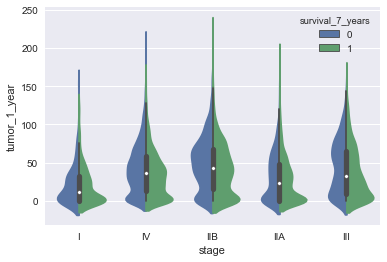

In [15]:
sns.violinplot(x='stage', y='tumor_1_year',hue='survival_7_years',data=Train_data,split=True)

Here we see most people lie with tumor size between 0-55mm and survival chnages for that and being in stage I abd II a is highest among all. 

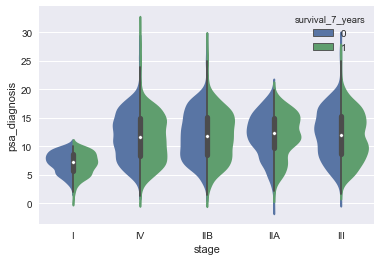

In [16]:
sns.violinplot(x='stage', y='psa_diagnosis',hue='survival_7_years',data=Train_data,split=True)

People with any stage have somehow similar probability of survival but it varies little bit with psa level at each stage. For Stage I it is between 5-10ng/ml whereas for others it is finely distributed.


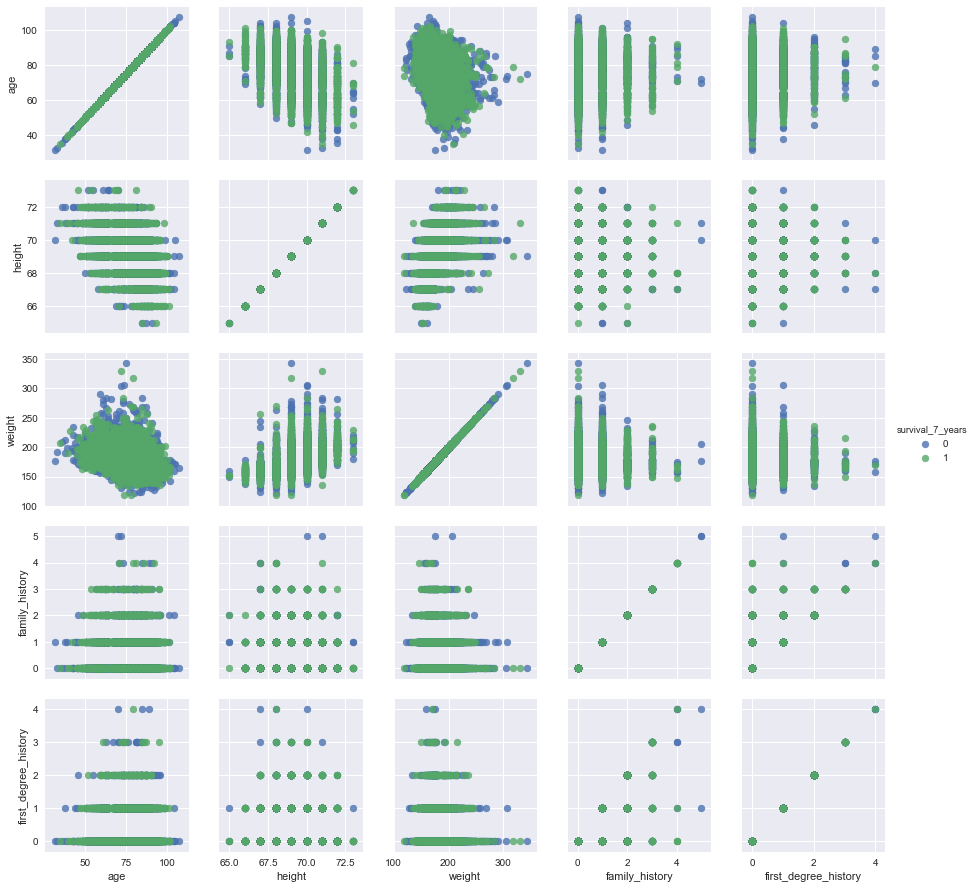

In [17]:
#To see if there any relation between categorical data:

g = sns.PairGrid(Train_data, vars=['age', 'height', 'weight','family_history','first_degree_history'],
                 hue='survival_7_years')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

There is no direct relation between these features but we can just see the ditribution of all to get more idea we can plot heatmap.

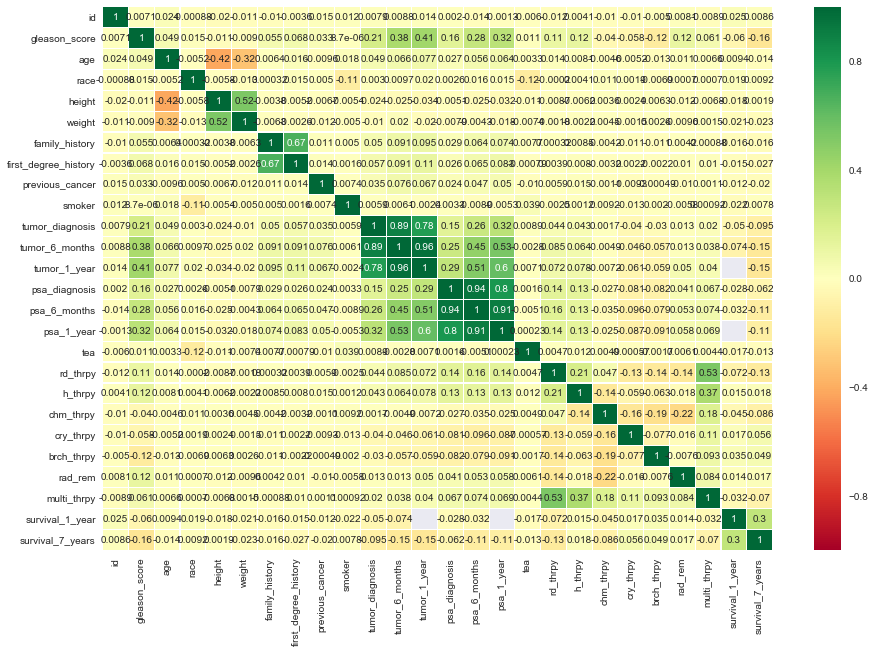

In [18]:
#To see if there is any correlation to find the reducdant feature:
sns.heatmap(Train_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.show()

As ,tumor_diagnosis and tumor_6_months are highly coprrelted with 0.94 score.
   tumor_6_months and tumor_1_year with correlation with 0.91 score
and tumor_diagnosis and tumor_1_year with correlation if 0.84.
   
Also,
psa_6_months and psa_1_year with corr of 0.96
psa_diagnosis and psa_6_months with corr of 0.89

So we can take any one out of those for our considerations as this will help creating more variated features

In [19]:
pd.crosstab(Train_data.side,Train_data.survival_7_years,margins=True).style.background_gradient(cmap='summer_r')

survival_7_years,0,1,All
side,,,
both,4397,3364,7761
left,1705,1323,3028
right,2632,1964,4596
All,8734,6651,15385


this makes sense that if tumor is spread on both sides

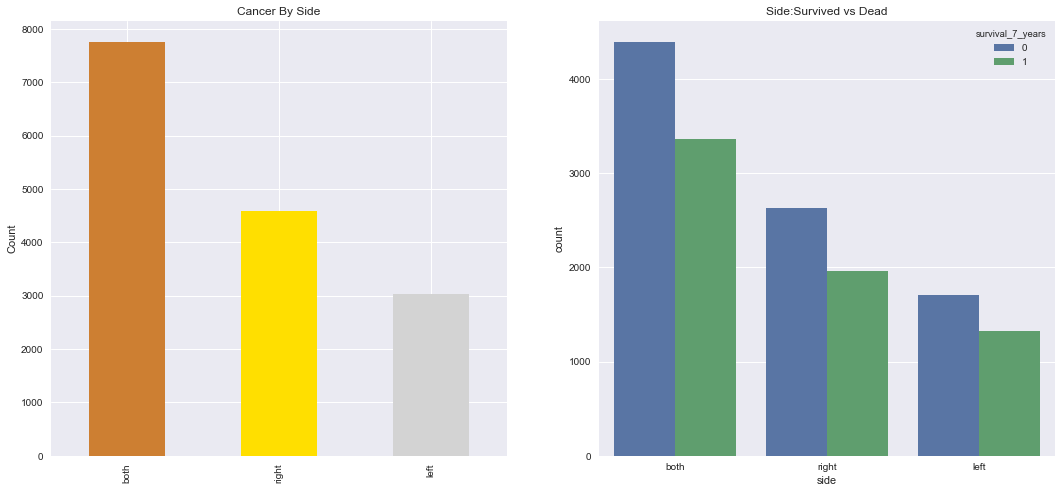

In [20]:
f,ax=plt.subplots(1,2,figsize=(18,8))
Train_data['side'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Cancer By Side')
ax[0].set_ylabel('Count')
sns.countplot('side',hue='survival_7_years',data=Train_data,ax=ax[1])
ax[1].set_title('Side:Survived vs Dead')
plt.show()


    End notes:
    1- We got co-related features that are to be removed.
    2- we saw a general trend of categorical and continuous features features. 


# 3.a) Handle Missing values:

In [21]:
#///////////////////////////////////////////On Train Data///////////////////////////////////////////////////////
#tumor_6_months and psa_6_months so many missing values so delete these columns itself
del Train_data['tumor_6_months']
del Train_data['psa_6_months']

#remove rows with symptoms not given
Train_data = Train_data.dropna(axis=0, subset=['symptoms'])


#Based On Mean
#Age,tumor_diagnosis, tumor_1_year , psa_diagnosis , psa_1_year, tea,
#height and weight might depend on race  with mean
Train_data["age"] = Train_data["age"].fillna(value=Train_data["age"].mean())
Train_data["tumor_diagnosis"] = Train_data["tumor_diagnosis"].fillna(value=Train_data["tumor_diagnosis"].mean())
Train_data["tumor_1_year"] = Train_data["tumor_1_year"].fillna(value=Train_data["tumor_1_year"].mean())
Train_data["psa_diagnosis"] = Train_data["psa_diagnosis"].fillna(value=Train_data["psa_diagnosis"].mean())
Train_data["psa_1_year"] = Train_data["psa_1_year"].fillna(value=Train_data["psa_1_year"].mean())
Train_data["tea"] = Train_data["tea"].fillna(value=Train_data["tea"].mean())
Train_data["height"] = Train_data["height"].fillna(value=Train_data["height"].mean())
Train_data["weight"] = Train_data["weight"].fillna(value=Train_data["weight"].mean())


#replaced with 0
#family_history,first_degree_history,previous_cancer,smoker all empyty at same row value
Train_data["family_history"] = Train_data["family_history"].fillna(0)
Train_data["first_degree_history"] = Train_data["first_degree_history"].fillna(0)
Train_data["previous_cancer"] = Train_data["previous_cancer"].fillna(0)
Train_data["smoker"] = Train_data["smoker"].fillna(0)


#fill Race with random values already present in the data
Train_data["race"].fillna(lambda x: random.choice(Train_data[Train_data['race'] != np.nan]["race"]), inplace =True)
Train_data["gleason_score"].fillna(lambda x: random.choice(Train_data[Train_data['gleason_score'] != np.nan]["gleason_score"]), inplace =True)


#///////////////////////////////////////////On Test Data///////////////////////////////////////////////////////

#tumor_6_months and psa_6_months so many missing values so delete these columns itself
del test_df['tumor_6_months']
del test_df['psa_6_months']

#remove rows with symptoms not given
test_df = test_df.dropna(axis=0, subset=['symptoms'])

#Based On Mean
#Age,tumor_diagnosis, tumor_1_year , psa_diagnosis , psa_1_year, tea,
#height and weight might depend on race  with mean
test_df["age"] = test_df["age"].fillna(value=test_df["age"].mean())
test_df["tumor_diagnosis"] = test_df["tumor_diagnosis"].fillna(value= test_df["tumor_diagnosis"].mean())
test_df["tumor_1_year"] = test_df["tumor_1_year"].fillna(value=test_df["tumor_1_year"].mean())
test_df["psa_diagnosis"] = test_df["psa_diagnosis"].fillna(value=test_df["psa_diagnosis"].mean())
test_df["psa_1_year"] =  test_df["psa_1_year"].fillna(value=test_df["psa_1_year"].mean())
test_df["tea"] = test_df["tea"].fillna(value=test_df["tea"].mean())
test_df["height"] = test_df["height"].fillna(value=test_df["height"].mean())
test_df["weight"] = test_df["weight"].fillna(value=test_df["weight"].mean())

#Replaced with 0
test_df["family_history"] = test_df["family_history"].fillna(0)
test_df["first_degree_history"] = test_df["first_degree_history"].fillna(0)
test_df["previous_cancer"] = test_df["previous_cancer"].fillna(0)
test_df["smoker"] = test_df["smoker"].fillna(0)
test_df["survival_1_year"] = test_df["survival_1_year"].fillna(0)

#fill Race with random values already present in the data
test_df["race"].fillna(lambda x: random.choice(test_df[test_df['race'] != np.nan]["race"]), inplace =True)
test_df["gleason_score"].fillna(lambda x: random.choice(test_df[test_df['gleason_score'] != np.nan]["gleason_score"]), inplace =True)



/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

In [22]:
#test_df.isnull().sum()

# 3b)One-Hot coding for Categorical Data

In [23]:
#convert categorical to numerical:

#side
one_hot = pd.get_dummies(Train_data['side'])
Train_data = Train_data.join(one_hot)

#n_score
one_hot1 = pd.get_dummies(Train_data['n_score'])
Train_data = Train_data.join(one_hot1)

#stage
one_hot_2 = pd.get_dummies(Train_data['stage'])
#del Train_data['n_score']
Train_data = Train_data.join(one_hot_2)

#m-score
one_hot_3 = pd.get_dummies(Train_data['m_score'])
Train_data = Train_data.join(one_hot_3)

#t_score
one_hot_2 = pd.get_dummies(Train_data['t_score'])
Train_data = Train_data.join(one_hot_2)

#sympotms 
Train_data = Train_data.join(Train_data['symptoms'].str.get_dummies(',').replace(0, ''))


#//////////////// for test data ////////////////////////////


#side
one_hot = pd.get_dummies(test_df['side'])
#del Train_data['n_score']
test_df = test_df.join(one_hot)

#n_score
one_hot = pd.get_dummies(test_df['n_score'])
test_df = test_df.join(one_hot)

#stage
one_hot_2 = pd.get_dummies(test_df['stage'])
test_df = test_df.join(one_hot_2)

#m-score
one_hot_3 = pd.get_dummies(test_df['m_score'])
test_df = test_df.join(one_hot_3)

#t_score
one_hot_2 = pd.get_dummies(test_df['t_score'])
test_df = test_df.join(one_hot_2)

#symptoms 
test_df = test_df.join(test_df['symptoms'].str.get_dummies(',').replace(0, ''))


In [24]:
#As we have already done with one-hot encoding we can delete the un-used columns:

del Train_data['n_score']
del Train_data['t_score']
del Train_data['m_score']
del Train_data['gleason_score']
del Train_data['side']
del Train_data['stage']
del Train_data['symptoms']
del Train_data['id']
del Train_data['diagnosis_date']


del test_df['symptoms']
del test_df['n_score']
del test_df['t_score']
del test_df['m_score']
del test_df['gleason_score']
del test_df['side']
del test_df['stage']
del test_df['diagnosis_date']

This is beacsue 'id' being the nominal feature, it is useless to include that when using classification.


In [25]:
#convert all the newly made columns form encoding to same dtype and filling the new empty if there with 0
Train_data = Train_data.convert_objects(convert_numeric=True)
test_df = test_df.convert_objects(convert_numeric=True)


Train_data = Train_data.fillna(0)
test_df = test_df.fillna(0)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


# 4) Predictive Modelling

In [26]:
# now prepare for features and predicted class:

#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [27]:
#prepearing the validation data of 20% and train data out of total training_data to do testing and build model.

train_Y = Train_data['survival_7_years']
del Train_data['survival_7_years']
del test_df['survival_7_years']
train_X= Train_data
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.20, random_state=0)

The accuracy of the Logistic Regression on test data is 0.6557595993322204

cross validation accuracy on train  0.6665308889886066
             precision    recall  f1-score   support

          0       0.71      0.68      0.69      1708
          1       0.59      0.63      0.61      1287

avg / total       0.66      0.66      0.66      2995



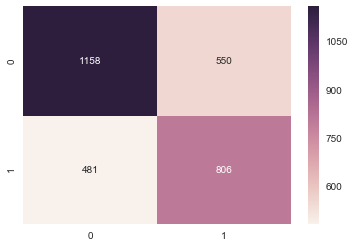

In [28]:
model = LogisticRegression(penalty='l1')
model.fit(X_train,y_train)
prediction3=model.predict(X_test)
#predict = model.predict(X_train)
print('The accuracy of the Logistic Regression on test data is',metrics.accuracy_score(prediction3,y_test))
#print('The accuracy of the Logistic Regression on train data is',metrics.accuracy_score(predict,y_train))
#cross val score on train
res = cross_val_score(model,X_train,y_train, cv = 10,scoring = "accuracy")
#print("\nAll cross validation accuracies on train ",res)
print("\ncross validation accuracy on train ",res.mean())
print(classification_report(y_test, prediction3))
cm = confusion_matrix(y_test,prediction3)
sns.heatmap(cm,annot=True,fmt='2.0f')

The accuracy of the Logistic Regression is 0.6547579298831385

All cross validation accuracies on train  [0.66511007 0.66755674 0.67423231 0.64886515 0.65397462 0.65197061
 0.65865063 0.66733467 0.66733467 0.65130261]

cross validation accuracy on train  0.660633208126094
             precision    recall  f1-score   support

          0       0.71      0.68      0.69      1708
          1       0.59      0.62      0.61      1287

avg / total       0.66      0.65      0.66      2995



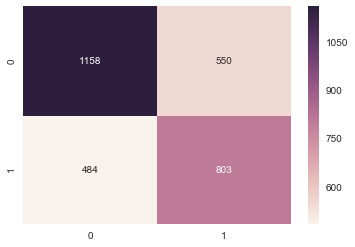

In [29]:
model = LogisticRegression(penalty='l2')
model.fit(X_train,y_train)
prediction3=model.predict(X_test)
predict = model.predict(X_train)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,y_test))
res = cross_val_score(model,train_X, train_Y, cv = 10,scoring = "accuracy")
print("\nAll cross validation accuracies on train ",res)
print("\ncross validation accuracy on train ",res.mean())
print(classification_report(y_test, prediction3))
cm = confusion_matrix(y_test,prediction3)
sns.heatmap(cm,annot=True,fmt='2.0f')

The accuracy of the svm is 0.6477462437395659


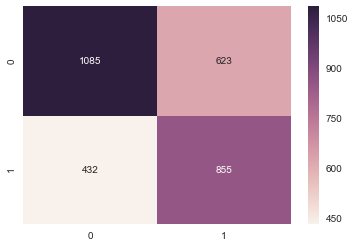

In [30]:
model=svm.SVC(kernel='linear',C=1,gamma=0.1)
model.fit(X_train,y_train)
prediction3=model.predict(X_test)
predict = model.predict(X_train)
print('The accuracy of the svm is',metrics.accuracy_score(prediction3,y_test))
#res = cross_val_score(model,train_X, train_Y, cv = 10,scoring = "accuracy")
#print("\nAll cross validation accuracies on train ",res)
#print("\ncross validation accuracy on train ",res.mean())
#print(classification_report(y_test, prediction3))
cm = confusion_matrix(y_test,prediction3)
sns.heatmap(cm,annot=True,fmt='2.0f')

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
The accuracy of the RandomForestClassifier is 0.6203672787979967

cross validation accuracy on train  0.638130255088375
             precision    recall  f1-score   support

          0       0.65      0.72      0.68      1708
          1       0.57      0.48      0.52      1287

avg / total       0.62      0.62      0.62      2995



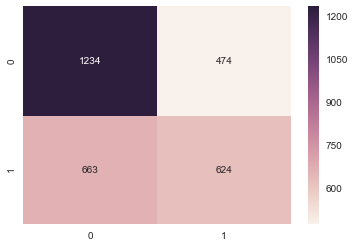

In [31]:
model=RandomForestClassifier(random_state = 42)

from pprint import pprint
print('Parameters currently in use:\n')
pprint(model.get_params())
model.fit(X_train,y_train)
prediction3=model.predict(X_test)
predict = model.predict(X_train)
print('The accuracy of the RandomForestClassifier is',metrics.accuracy_score(prediction3,y_test))
res = cross_val_score(model,train_X, train_Y, cv = 10,scoring = "accuracy")
#print("\nAll cross validation accuracies on train ",res)
print("\ncross validation accuracy on train ",res.mean())
print(classification_report(y_test, prediction3))
cm = confusion_matrix(y_test,prediction3)
sns.heatmap(cm,annot=True,fmt='2.0f')

The accuracy of the GaussianNB is 0.5542570951585977

All cross validation accuracies on train  [0.57171448 0.58678238 0.57810414 0.56608812 0.57114228 0.56245825
 0.56245825 0.57782231 0.56780227 0.55778223]

cross validation accuracy on train  0.5702154707023729
             precision    recall  f1-score   support

          0       0.90      0.24      0.38      1708
          1       0.49      0.97      0.65      1287

avg / total       0.73      0.55      0.50      2995



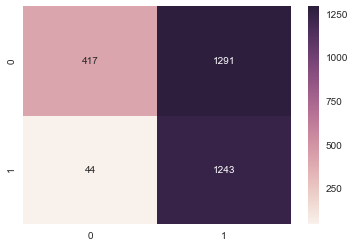

In [32]:
model=GaussianNB()
model.fit(X_train,y_train)
prediction3=model.predict(X_test)
predict = model.predict(X_train)
print('The accuracy of the GaussianNB is',metrics.accuracy_score(prediction3,y_test))
#cross val score on train
res = cross_val_score(model,train_X, train_Y, cv = 10,scoring = "accuracy")
print("\nAll cross validation accuracies on train ",res)
print("\ncross validation accuracy on train ",res.mean())
print(classification_report(y_test, prediction3))
cm = confusion_matrix(y_test,prediction3)
sns.heatmap(cm,annot=True,fmt='2.0f')

The accuracy of the KNeighborsClassifier is 0.5669449081803005

cross validation accuracy on train  0.5803867227791618
             precision    recall  f1-score   support

          0       0.61      0.65      0.63      1708
          1       0.50      0.46      0.48      1287

avg / total       0.56      0.57      0.56      2995



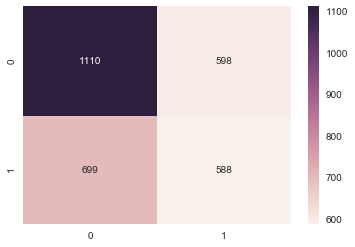

In [33]:
model=KNeighborsClassifier() 
model.fit(X_train,y_train)
prediction3=model.predict(X_test)
predict = model.predict(X_train)
print('The accuracy of the KNeighborsClassifier is',metrics.accuracy_score(prediction3,y_test))
res = cross_val_score(model,X_train,y_train, cv = 10,scoring = "accuracy")
#print("\nAll cross validation accuracies on train ",res)
print("\ncross validation accuracy on train ",res.mean())
print(classification_report(y_test, prediction3))
cm = confusion_matrix(y_test,prediction3)
sns.heatmap(cm,annot=True,fmt='2.0f')

    1)Till here we saw that we are getting highest accuracy on Logistic regression of and Random Forrest of among all the selected ones.
    2)Even we can observe the confusion matrix to proove that errors, they make comapratibvely lesser number of errors.

    


# Hyper-Parameters Tuning:

As machine learning models behave like a Black-Box so we there are some default parameter values, which we can tune or change to get a better model. 
Like the C and estimators in the RandomForest model.

We will tune the hyper-parameters for the 2 best classifiers i.e the Logistic Regression and RandomForests.

For L2 Logistic Regression

In [34]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [35]:
grid = {
        'C': np.power(10.0, np.arange(-10, 10))
         , 'solver': ['newton-cg']}

clf_log = LogisticRegression(penalty='l2', random_state=777, max_iter=10000, tol=10)
gs_log = GridSearchCV(clf_log,grid,scoring='roc_auc')
mod = gs_log.fit(X_train,y_train)


print(gs_log.best_score_)
print(gs_log.best_estimator_)
print(gs_log.best_params_)


0.7368154567310364
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=777, solver='newton-cg', tol=10,
          verbose=0, warm_start=False)
{'C': 0.1, 'solver': 'newton-cg'}


In [36]:
searchCV = LogisticRegressionCV(
        Cs=list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,scoring='roc_auc'
        ,random_state=777
        ,max_iter=10000
        ,fit_intercept=True
        ,solver='newton-cg'
        ,tol=10
    )
searchCV.fit(X_train,y_train)

print ('Max auc_roc:', searchCV.scores_[1].mean(axis=0).max())

Max auc_roc: 0.7369332546788606


#For SVM

from sklearn.model_selection import GridSearchCV
C=[0.05,0.2,0.5,0.8,1]
gamma=[0.1,0.4,0.7,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X_train,y_train)
print(gd.best_score_)
print(gd.best_estimator_)

for Random Forrest

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=0)

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

In [ ]:
param_grid = {
    'bootstrap': [True,False],
    'max_depth': [80, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=param_grid,cv=5,verbose=True)
gd.fit(X_train,y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


# Ensembling

#X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=0)

from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('RF',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.1)),
                                              ('svm',svm.SVC(kernel='linear',probability=True)),
                                             ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                             ], 
                       voting='soft').fit(X_train, y_train)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(X_test,y_test))

#cross=cross_val_score(ensemble_lin_rbf,train_X,train_Y, cv = 10,scoring = "accuracy")
#print('The cross validated score is',cross.mean())

Taking a lot so computation time

# BOOSTING

In [37]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,train_X,train_Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.6633055303699485


In [38]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,train_X,train_Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.6702499046848349


In [39]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,train_X,train_Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

#ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
#result=cross_val_predict(ada,X,Y,cv=10)
#sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
#plt.show()

/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

The cross validated score for XGBoost is: 0.663972998164322


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Bagging

In [40]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(X_train, y_train)
prediction=model.predict(X_test)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,y_test))
result=cross_val_score(model,train_X, train_Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.6514190317195325
The cross validated score for bagged Decision Tree is: 0.6586964906619317


# Best is tuned - logistic regression

In [45]:
model = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=777, solver='newton-cg', tol=10,
          verbose=0, warm_start=False)
model.fit(train_X, train_Y)
l1_features_wgt=np.argsort(np.abs(model.coef_[0]))[::-1]
flag=10
print("top 10 features by tuned-log_ression are:\n")
for i in l1_features_wgt:
    if flag>0:
        print("%s\t%0.3f" %(train_X.columns[i], model.coef_[0][i]))
        flag-=1
    else:
        break

top 10 features by tuned-log_ression are:

survival_1_year	3.501
N1	-0.617
S10	-0.476
P03	-0.404
U05	-0.381
M0	0.374
rd_thrpy	-0.352
O09	-0.318
IV	-0.312
O08	-0.294


In [47]:
print(test_df.shape)
print(Train_data.shape)

(11207, 63)
(14975, 62)


In [48]:
test_features = test_df
ids =  test_features['id']
del test_features['id']

In [49]:
prediction = gs_log.predict(test_df)

In [50]:
test_df['survival_7_years'] = pd.DataFrame(prediction)
test_df.insert(loc=0, column='id', value=ids)
#test_df = test_df.append(df_a)

In [51]:
test_df.to_csv('/Users/charusaxena/Desktop/participant_files/Charu_score.csv', sep='\t',encoding='utf-8')